In [2]:
import pandas as pd 
import numpy as np
import warnings
warnings.simplefilter('ignore')

%matplotlib inline 

import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../../../data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Выжившие
df['Survived'].mean()

0.3838383838383838

In [5]:
df[df['Survived'] == 1]['Age'].mean()#средний возраст выжевших

28.343689655172415

In [7]:
#зависимость пола от класса
pd.crosstab(df.Sex, df.Pclass, normalize=False)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [6]:
df.loc[0:5, 'Survived':'Sex']# первые пять id, с первого столбца по "Sex" столбец

,Survived,Pclass,Name,Sex
0,0,3,"Braund, Mr. Owen Harris",male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,1,3,"Heikkinen, Miss. Laina",female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,0,3,"Allen, Mr. William Henry",male
5,0,3,"Moran, Mr. James",male


In [9]:
#зависимость цена от пола
numeric = ['Fare']
df.groupby("Sex")[numeric].describe()

Fare                                                              
        count       mean        std   min        25%   50%    75%       max
Sex                                                                        
female  314.0  44.479818  57.997698  6.75  12.071875  23.0  55.00  512.3292
male    577.0  25.523893  43.138263  0.00   7.895800  10.5  26.55  512.3292

In [7]:
df[-1:]#последний id

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
#средний возраст по цене
df.pivot_table(['Fare', 'Age'], ['Sex', 'Embarked'], aggfunc="median").head()

Age      Fare
Sex    Embarked                
female C         24.0  56.92920
       Q         21.5   7.76875
       S         27.0  24.15000
male   C         30.0  24.00000
       Q         30.0   7.75000

In [22]:
d={'male': 'MALE', 'female': 'FEMALE'}
df['Sex']=df['Sex'].map(d)#Замена в 'Sex' колонке
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,S


In [9]:
pd.crosstab(df['Survived'], df['Pclass'], margins=True)#класс билета и статус выжил или нет, больше выжили в первом классе, а умерли в третьем

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


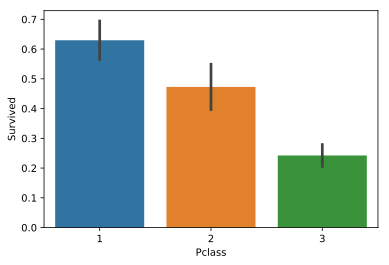

In [11]:
sns.barplot(y="Survived", x="Pclass", data=df)#график
#класс билета и вероятность выжить, больше всего вероятность у первого

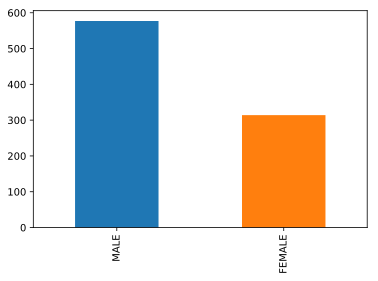

In [12]:
df['Sex'].value_counts().plot(kind = 'bar')#Видим сколько всего женщин и мужчин на корабле

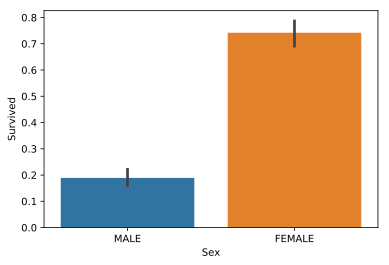

In [13]:
sns.barplot(y="Survived", x="Sex", data=df)
#таблица шансов выжить по полу

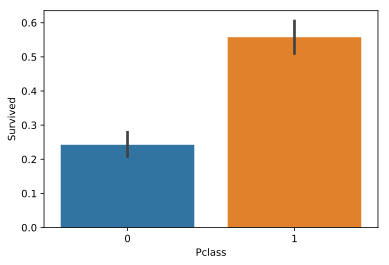

In [14]:
sns.barplot(y="Survived", x=(df['Pclass'] != 3).astype('int'), data=df)
# На графике можно сравнить отношение количества выживших купивших билет 3 класса и остальных ('Pclass==1'- 2-3 класс,'Pclass==0'-3 класс) 
#шансы выжить у 3 класса почти в 2 раза меньше

In [15]:
pd.crosstab( df['Sex'], (df['Pclass'] == 3) & df['Survived'], margins=True)#Таблица выживших пассажиров 3 класса по полу(false - 1 или 2 класс, либо это 3 класс, но мертвый),

col_0,False,True,All
Sex,,,
FEMALE,242,72,314
MALE,530,47,577
All,772,119,891


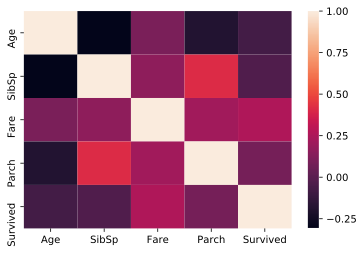

In [16]:
corr_matrix = df[['Age', 'SibSp', 'Fare', 'Parch','Survived']].corr()
sns.heatmap(corr_matrix)
# корреляция, лучшая sibsp и parch

Распределение количественных признаков


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013303D4E208>,
      dtype=object)

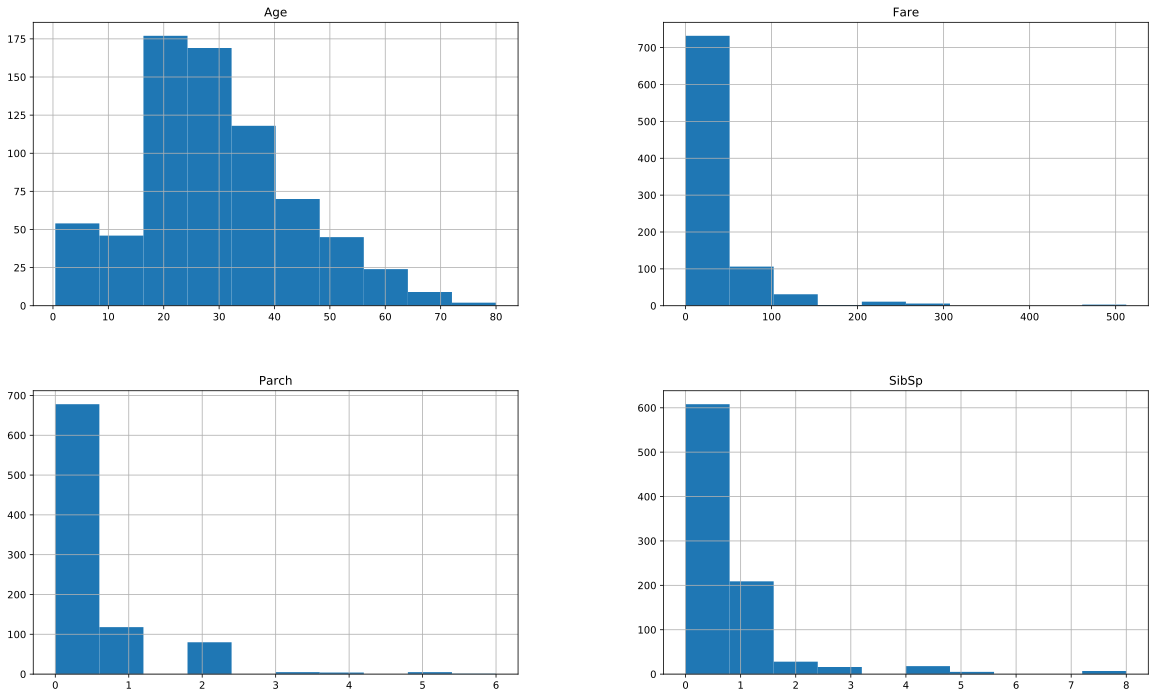

In [17]:
print('Распределение количественных признаков')
features = ['Age', 'Fare', 'SibSp', 'Parch']
df[features].hist(figsize=(20,12))
# Наибольшее количество пассажиров в возрасте 20 лет
# Большая часть билетов стоила менее 60 долларов

In [15]:
sns.pairplot(df[features + ['Survived']], hue='Survived');#Оранжевые живые, синие - нет

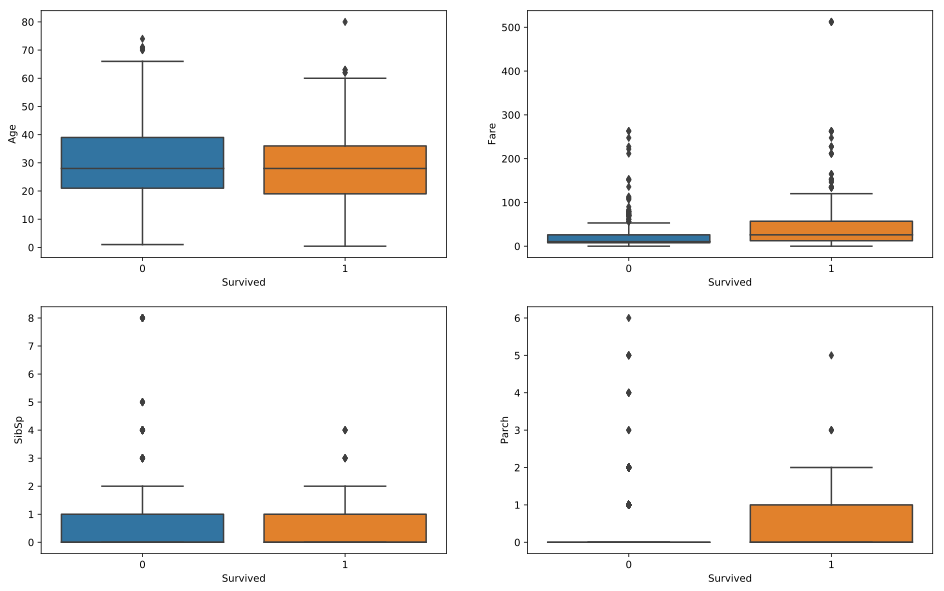

In [18]:
import math
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
for idx, feat in enumerate(features):
    sns.boxplot(x = 'Survived',
                y = feat, data = df, 
                ax = axes[math.floor(idx / 2), idx%2])
    axes[math.floor(idx / 2), idx%2].set_xlabel('Survived')
    axes[math.floor(idx / 2), idx%2].set_ylabel(feat)
#Аналогично предъидущему, только в боксплоте больше сделан акцент на выделение основной массы и выбросов

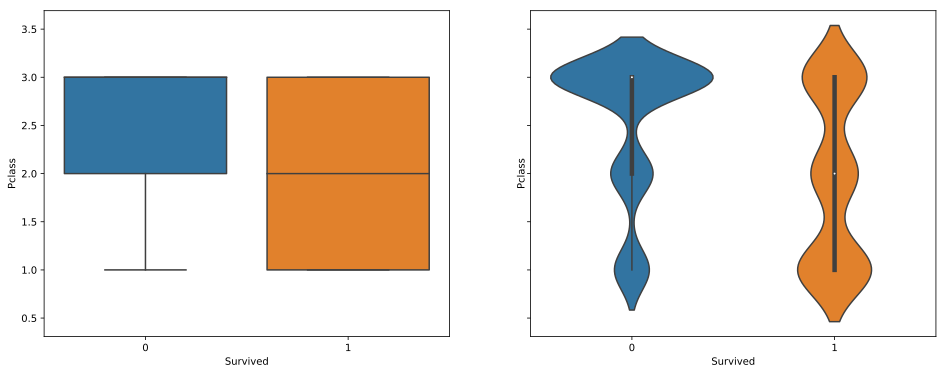

In [19]:
_, axes = plt.subplots(1, 2, sharey = True, figsize=(16,6))

sns.boxplot(x="Survived", y='Pclass', data = df, ax = axes[0])
sns.violinplot(x='Survived', y='Pclass', data = df, ax = axes[1])
# Выжившие в зависимости от класса билета на двух разных видах графика. Видим что выжили примерно равное колличество человек независимо от класса, а погибло больше в 3 классе

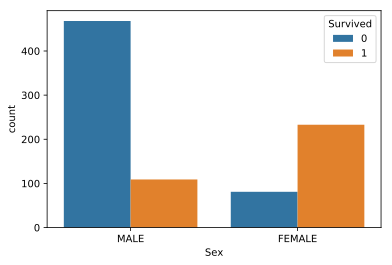

In [20]:
sns.countplot(x = 'Sex', hue='Survived', data = df)
# Здесь видно сколько выжило и не выжило мужчин и женщин

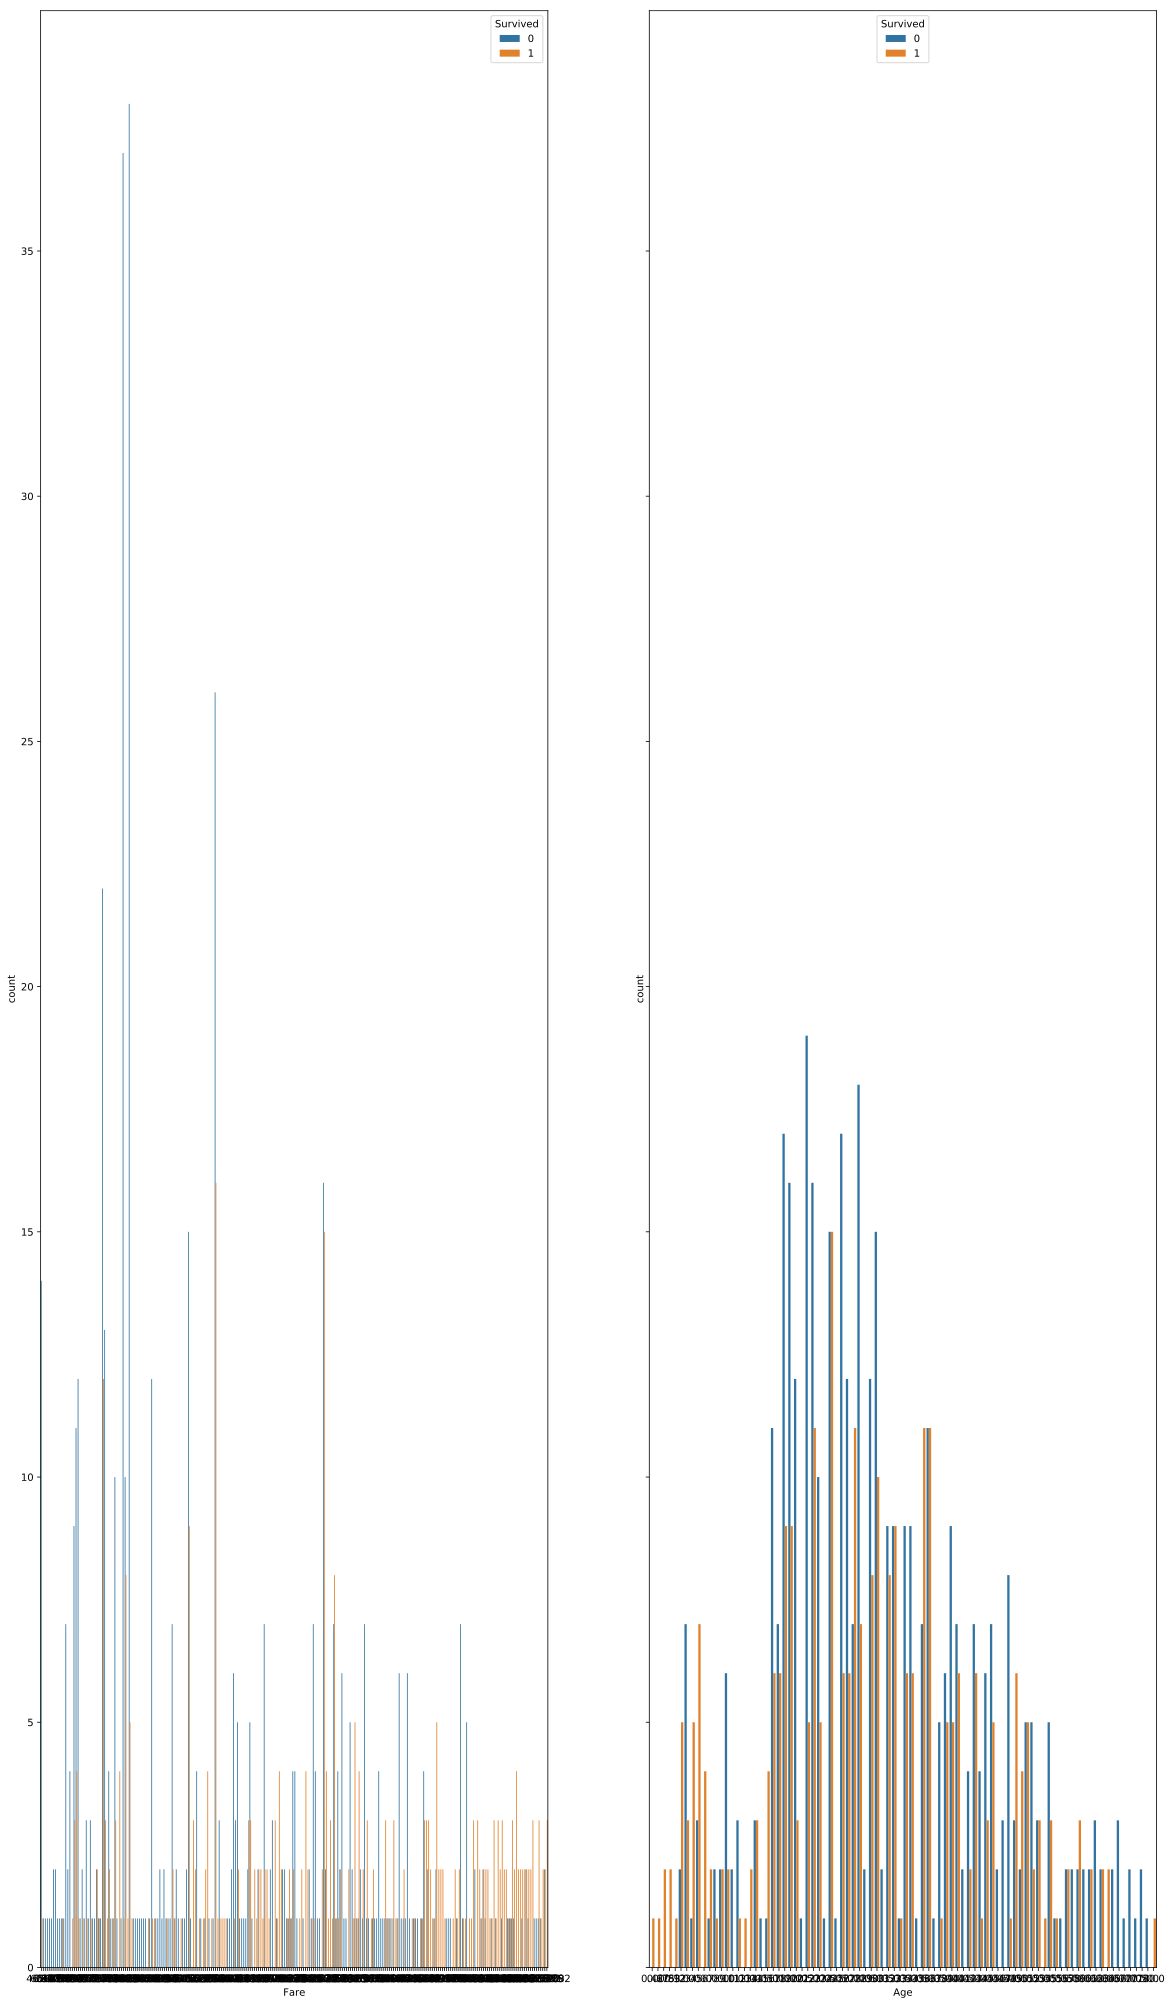

In [21]:
_, axes = plt.subplots(1, 2, sharey = True, figsize=(20,36))

sns.countplot(x = 'Fare', hue='Survived', data = df, ax=axes[0])

sns.countplot(x = 'Age', hue='Survived', data = df, ax=axes[1])

# Изображены зависимости выживания в зависимости от возраста и цены билета